# Python 기초 통계 - Day5 - Final Report & Presentation
이번 시간은 Day1 - Day4 기간 동안 배운 개념을 활용해 최종 데이터 분석 리포트를 작성하고 발표하는 시간입니다. 

여러분이 선정한 데이터로 아래의 과정을 수행함으로써 Python 기초 통계에서 배운 내용을 내재화하는 시간이 되시길 바랍니다. 

---
**[ 내용 구성 ]**

※ 아래의 내용이 포함되어야 합니다. 

### 1. 문제 정의 
    - 분석을 통해 검증하고자 하는 가설이나 얻고자 하는 결과물 설명.
    - 분류 문제인지 회귀 문제인지 설명. 
### 2. 데이터 EDA & 전처리
    - EDA: 데이터의 기본적인 shape을 파악하고, 기술통계량이나 분포를 다양한 시각화 차트로 표현.
    - 전처리: 중복값, 결측치, 잘못된 값 등이 없는지 확인하고 적절한 기법으로 처리.
### 3. 데이터 분석 기법 선정 이유
    - 가설검정, 선형회귀, 로지스틱회귀, 의사결정나무, K-means클러스터링 중에서 분석 기법을 선정하고 그 이유를 설명. 
### 4. 데이터 분석 모델링 (모델 구현)
    - 분석 모델 구현 및 결과 도출.
### 5. 분석 모델 결과 해석 및 인사이트 제안
    - 분석 모델 결과 해석 및 인사이트 제안
    - 해석 기법 (ex. 의사결정트리의 경우 plot_tree, feature_importance 사용, 선형회귀 모델의 경우 statsmodel summary report 활용 등.)
    
---

## 1. 문제 정의 

- 부산관할 지역의 학원마다 특징을 발견하기.
- 교육 분야, 학원 종류 별 교습시간에 차이가 있을 것이다.
- 교육비는 변수마다 서로 상관이 있을 것이다.
- 학원종류에 변수마다 연관성이 있을 것이다.
- 변수들로 학원 종류를 예측할 수 있을 것이다.

---
범주형 데이터를 다루기 때문에 분류분석을 진행하지만, 변수들간의 관련성을 보기위해 카이제곱 검정을, 이진 분류가 가능한 학원종류에 대한 상관을 확인하기 위해 로지스틱회귀 분석을 사용한다  
두 결과를 토대로 예측이 가능한 모델을 만들기 위해 의사결정 나무를 사용한다  

## 2. 데이터 EDA

In [1]:
import pandas as pd
academy = pd.read_csv(r'C:\Users\BIG3-05\Downloads\학원 현황(2023.12.31.기준).csv', encoding="cp949")
academy.head()
academy.shape

(51175, 21)

---
데이터 특성 확인과 결측치 처리

In [2]:
academy.dtypes

연번          float64
관할교육지원청      object
학원명          object
전화번호         object
위치           object
학원종류         object
분야구분         object
교습계열         object
교습과정         object
교습과목(반)      object
총교습시간(분)    float64
교습비         float64
교재비         float64
모의고시비       float64
재료비         float64
급식비         float64
기숙사비        float64
차량비         float64
피복비         float64
기타경비합계      float64
총교습비        float64
dtype: object

In [3]:
academy.isna().sum()

연번              2
관할교육지원청         0
학원명             0
전화번호        15142
위치              0
학원종류        13181
분야구분            0
교습계열         1061
교습과정         1090
교습과목(반)        23
총교습시간(분)       25
교습비             2
교재비             4
모의고시비           4
재료비             4
급식비             4
기숙사비            4
차량비             4
피복비             4
기타경비합계          4
총교습비            4
dtype: int64

In [4]:
academy = academy.fillna(0)
academy.isna().sum()

연번          0
관할교육지원청     0
학원명         0
전화번호        0
위치          0
학원종류        0
분야구분        0
교습계열        0
교습과정        0
교습과목(반)     0
총교습시간(분)    0
교습비         0
교재비         0
모의고시비       0
재료비         0
급식비         0
기숙사비        0
차량비         0
피복비         0
기타경비합계      0
총교습비        0
dtype: int64

---
데이터 EDA

In [5]:
academy['연번'] = academy['연번'].astype(int)

In [6]:
academy = academy.drop(academy[(academy['관할교육지원청'] == '3240') | (academy['관할교육지원청'] == '3360')].index)
print(academy['관할교육지원청'].unique()) # 관할교육지원청에 이상치를 발견해 제거

['서부' '남부' '북부' '동래' '해운대']


In [7]:
numeric = academy.select_dtypes(include='number')
columns_to_group = ['관할교육지원청'] + list(numeric.columns)

In [8]:
max_values_by_region = academy[columns_to_group].drop(columns=['연번']).groupby('관할교육지원청').max()
display(max_values_by_region)

,총교습시간(분),교습비,교재비,모의고시비,재료비,급식비,기숙사비,차량비,피복비,기타경비합계,총교습비
관할교육지원청,,,,,,,,,,,
남부,3370400.0,19900000.0,0.0,160000.0,2399980.0,150000.0,0.0,0.0,0.0,0.0,19900000.0
동래,259200.0,9000000.0,0.0,67000.0,1890000.0,0.0,0.0,35000.0,0.0,1890000.0,9000000.0
북부,259200.0,5500000.0,0.0,17000.0,1800000.0,130000.0,800000.0,70000.0,1260000.0,1800000.0,5500000.0
서부,120960.0,5500000.0,0.0,0.0,20000.0,0.0,0.0,0.0,0.0,20000.0,8790000.0
해운대,129600.0,35000000.0,0.0,270000.0,1600000.0,200000.0,1100000.0,110000.0,1605000.0,1605000.0,35000000.0


In [9]:
count_values_by_region = academy[columns_to_group].drop(columns=['연번']).groupby('관할교육지원청').count()
display(count_values_by_region)

,총교습시간(분),교습비,교재비,모의고시비,재료비,급식비,기숙사비,차량비,피복비,기타경비합계,총교습비
관할교육지원청,,,,,,,,,,,
남부,11062,11062,11062,11062,11062,11062,11062,11062,11062,11062,11062
동래,12698,12698,12698,12698,12698,12698,12698,12698,12698,12698,12698
북부,7514,7514,7514,7514,7514,7514,7514,7514,7514,7514,7514
서부,6714,6714,6714,6714,6714,6714,6714,6714,6714,6714,6714
해운대,13185,13185,13185,13185,13185,13185,13185,13185,13185,13185,13185


In [10]:
mean_values_by_region = academy[columns_to_group].drop(columns=['연번']).groupby('관할교육지원청').mean().round(1)
display(mean_values_by_region)

,총교습시간(분),교습비,교재비,모의고시비,재료비,급식비,기숙사비,차량비,피복비,기타경비합계,총교습비
관할교육지원청,,,,,,,,,,,
남부,2947.1,503407.6,0.0,14.5,7079.0,43.4,0.0,0.0,0.0,0.0,510544.4
동래,2382.3,256351.4,0.0,26.4,1087.2,0.0,0.0,5.1,0.0,1118.7,256596.4
북부,1950.0,261044.9,0.0,6.8,956.1,69.2,532.3,113.0,476.3,2153.8,206527.2
서부,1824.8,279562.2,0.0,0.0,6.0,0.0,0.0,0.0,0.0,6.0,197248.5
해운대,2048.4,307874.1,0.0,54.3,483.8,58.4,607.1,80.4,406.1,1690.1,265538.0


In [11]:
median_values_by_region = academy[columns_to_group].drop(columns=['연번']).groupby('관할교육지원청').median()
display(median_values_by_region)

,총교습시간(분),교습비,교재비,모의고시비,재료비,급식비,기숙사비,차량비,피복비,기타경비합계,총교습비
관할교육지원청,,,,,,,,,,,
남부,1300.0,250000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000.0
동래,1200.0,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200000.0
북부,1200.0,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170000.0
서부,1200.0,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140000.0
해운대,1260.0,205000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180000.0


In [12]:
mode_values_by_region = academy[columns_to_group].drop(columns=['연번']).groupby('관할교육지원청').agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None)
display(mode_values_by_region)

,총교습시간(분),교습비,교재비,모의고시비,재료비,급식비,기숙사비,차량비,피복비,기타경비합계,총교습비
관할교육지원청,,,,,,,,,,,
남부,1200.0,300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0
동래,1440.0,150000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150000.0
북부,1200.0,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
서부,1200.0,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
해운대,1260.0,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


기술통계적 분석결과   
: 남부에 총 교습시간, 총 교습비의 평균이 다른 지역에 비해 높은 것을 확인할 수 있었다. 그러나 중앙값을 계산하면 5지역 모두 큰 차이를 보이지 않는다. 이는 데이터의 분포가 한쪽으로 치우쳐져 있거나, 이상치가 있는 경우를 의미한다. 즉, 남부의 경우 평균은 상당히 높게 나타났지만 중앙값은 낮게 나타난 것으로 보아, 총 교습시간이 높은 몇몇 학원들이 평균을 높게 만든 것으로 예상할 수 있다. 반면, 서부의 경우는 평균과 중앙값이 비슷하게 나타난 것으로 보아, 데이터가 비교적 균일한 분포를 가지고 있거나, 이상치가 없는 경우일 수 있다.

따라서 이러한 정보를 종합해보면, 남부와 서부의 교습시간 분포가 다르다는 것을 알 수 있다. 남부는 몇몇 학원들의 높은 교습시간으로 인해 평균이 높게 나타났지만, 서부는 균일한 분포를 가지고 있거나 이상치가 없는 것으로 보인다.

---

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns

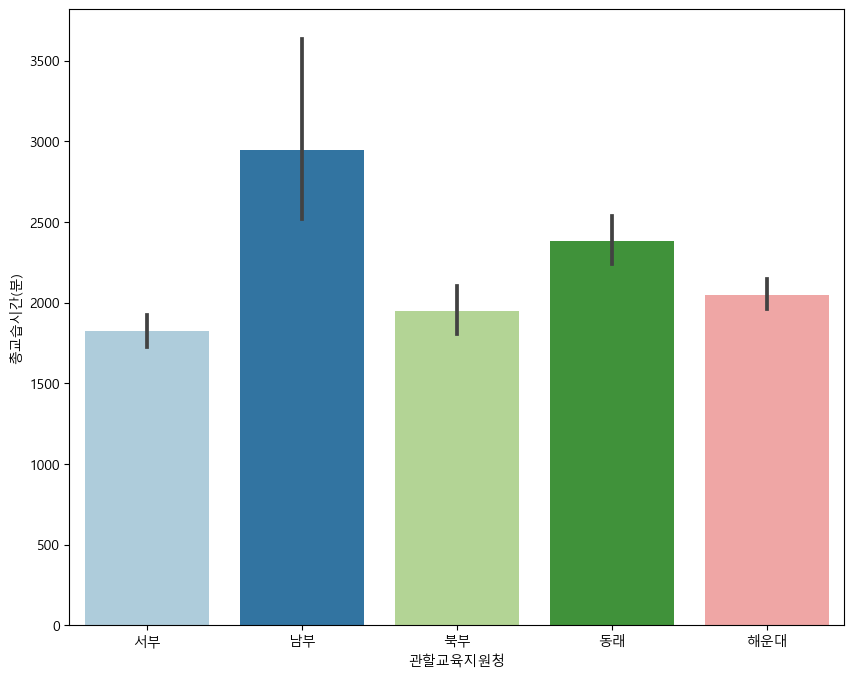

In [14]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="관할교육지원청", y="총교습시간(분)", data=academy,
            label="Total", palette="Paired")

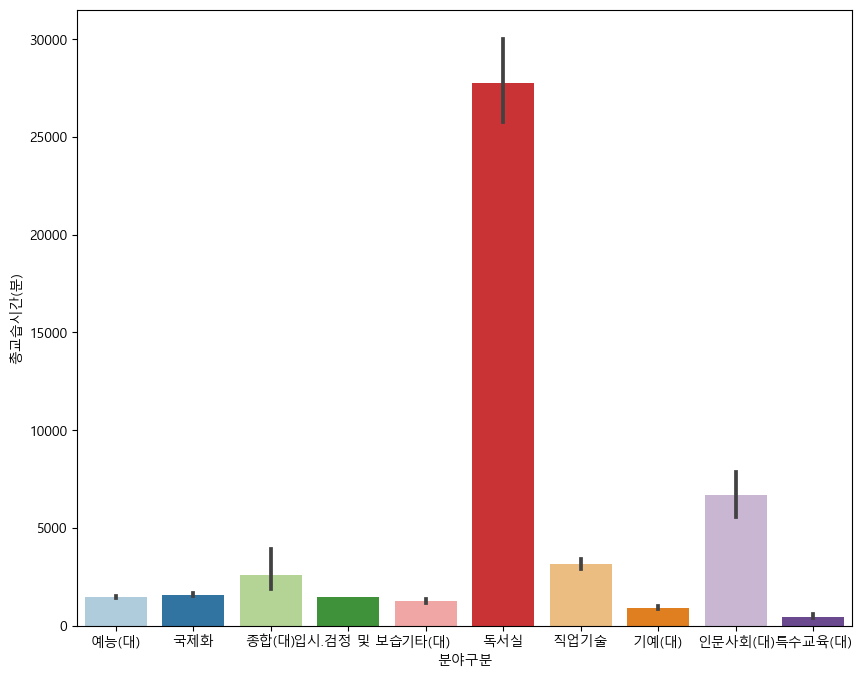

In [15]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="분야구분", y="총교습시간(분)", data=academy,
            label="Total", palette="Paired")

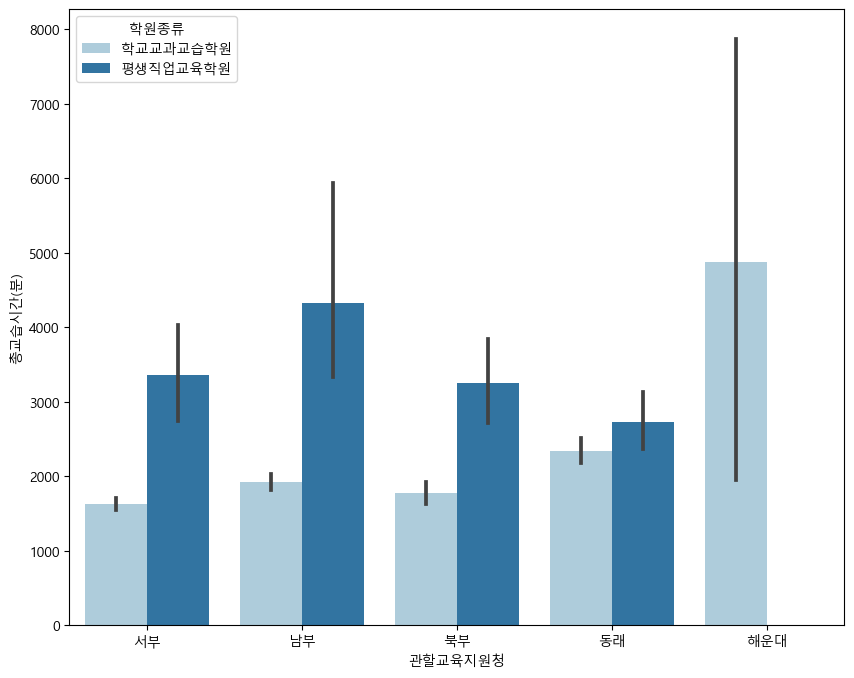

In [16]:
import seaborn as sns
academy = academy.drop(academy[(academy['학원종류'] == 0)].index)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x="관할교육지원청", y="총교습시간(분)", hue="학원종류", data=academy,
            palette="Paired")

데이터 시각화 결과  
: 부산의 관할 지역은 남부, 동래, 북부, 서부, 해운대 총 5지역에서 남부가 가장 많은 시간을 학습하는 것으로 보이나 이상 치로 인한 오차범위가 넓어 값으로 확인해야 할 필요가 있어 앞서 평균과 중앙값을 비교하였다  
: 총 교습시간은 학원 분야에 대한 값에서도 차이를 보였다. 독서실 분야가 다른 분야의 학원보다 월등히 학습에 할애하는 시간이 많은 것으로 확인된다. 이는 독서실의 특성과 연관 지어 생각할 수 있는데, 절대적인 시간을 많이 할애하고 자유도가 높은 독서실이 교습시간이 높게 나타나는 것으로 생각된다  
: 다음은 학원 종류에 따른 분포를 시각화한 자료이다. 학원 종류는 초, 중, 고등학교와 관련된 ‘학교교과교습학원’과 성인교육인 ‘평생직업교육학원’으로 구분된다. 다른 지역에서는 학교교과교습학원(이하 '교습학원')보다 평생직업교육학원(이하 '평생교육')이 많은 시간을 할애하는 것으로 보였지만 해운대는 평생직업교육학원에 대한 시간이 없었다. 해운대에는 평생교육시설이 부족함으로 사료되나 지역적, 문화적으로 연관이 있을 수 있으므로 추가적인 정보 수집이 필요한 것으로 보인다. 

---
비용간 상관 계수를 계산에 상관 관계 알아보기

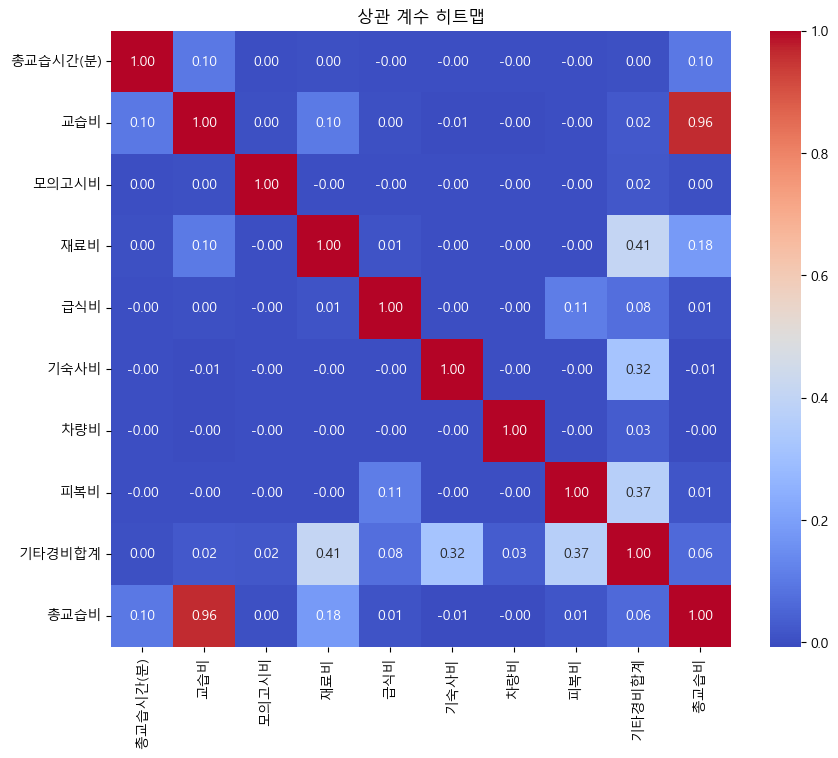

In [17]:
# 상관 계수 계산
correlation_matrix = academy.drop(columns=['연번', '관할교육지원청', '학원명','전화번호','위치','학원종류','분야구분' ,'교습계열','교습과정','교습과목(반)', '교재비']).corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('상관 계수 히트맵')
plt.show()

상관계수 결과  
: 학원에 들어가는 비용들 간에 상관계수를 나타낸 히트맵이다. 다른 변수들은 큰 상관을 보이지 않지만 총 교습비와 교습비는 높은 상관을 나타냈다. 기타 경비와 교습비의 합인 총 교습비에 이런 상관계수가 나오는 것은 기타경비의 합계보다 교습비 자체만으로도 총교습비에 큰 영향을 주는 것으로 보인다

---

## 3. 데이터 분석 기법 선정 이유와 얻고자 하는 아웃풋

- 부산 관할 지역의 특성을 고려 했을 때 학교 교육인 '교습학원'과 '평생교육'에 대해 어떤 변수들이 작용하는 지 카이제곱검정과 로지스틱회귀분석을 통해 알아본다
- 적용하는 변수를 토대로 의사결정나무를 통해 학원 종류를 예측하는 모델을 구축한다

## 4. 데이터 분석 모델링 (가설검정, 선형회귀, 로지스틱회귀, 의사결정나무, K-means클러스터링 중에서 선택)

In [18]:
#학원종류 이진분류
mapping = {'학교교과교습학원': 0 , '평생직업교육학원': 1}
academy['학원종류'] = academy['학원종류'].map(mapping)

In [19]:
#학원 종류와 분야 구분에 대한 카이제곱검정
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(academy['학원종류'], academy['분야구분'])
display(contingency_table) 

chi2, p_value, df, table = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("귀무가설 기각. \n통계적으로 유의미한 연관성이 있다.")
else:
    print("귀무가설 기각할 수 없음. \n통계적으로 유의미한 연관성이 없다.")

table

분야구분,국제화,기예(대),기타(대),독서실,예능(대),인문사회(대),입시.검정 및 보습,종합(대),직업기술,특수교육(대)
학원종류,,,,,,,,,,
0,2552,0,1122,630,6720,0,17096,2052,4,4
1,1046,957,0,168,0,328,0,1725,3588,0


Chi-square statistic: 26875.983235863157
P-value: 0.0
귀무가설 기각. 
통계적으로 유의미한 연관성이 있다.


array([[2.85817119e+03, 7.60219520e+02, 8.91291851e+02, 6.33913455e+02,
        5.33821857e+03, 2.60555907e+02, 1.35806822e+04, 3.00036481e+03,
        2.85340493e+03, 3.17751105e+00],
       [7.39828806e+02, 1.96780480e+02, 2.30708149e+02, 1.64086545e+02,
        1.38178143e+03, 6.74440935e+01, 3.51531775e+03, 7.76635186e+02,
        7.38595073e+02, 8.22488945e-01]])

---
학원 종류와 분야 구분에 대한 변수가 서로 유의미한 연관성이 있는지를 알아보기 위해 카이제곱검정을 사용했다. 이는 특정 유형의 학원이 특정 분야에 주로 특화되어 있는 것을 나타낼 수 있는데, 예를 들어 학교에서는 입시 검정 보습이 특화되어 있지만 평생교육에서는 직업기술에 특화한 것을 수치상으로 확인할 수 있었다.   
p-value 또한 0.0으로 통계적으로 유의미하다고 판단된다.

---

In [20]:
#학원 종류와 관할교육지원청에 대한 카이제곱검정

import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(academy['학원종류'], academy['관할교육지원청'])
display(contingency_table) # 두 변수들의 value들을 조합한 후, 각 조합별 데이터수를 표현한 테이블

chi2, p_value, df, table = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("귀무가설 기각. \n통계적으로 유의미한 연관성이 있다.")
else:
    print("귀무가설 기각할 수 없음. \n통계적으로 유의미한 연관성이 없다.")

table

관할교육지원청,남부,동래,북부,서부,해운대
학원종류,,,,,
0,6366,11264,6603,5943,4
1,4696,1434,911,771,0


Chi-square statistic: 4580.205617953835
P-value: 0.0
귀무가설 기각. 
통계적으로 유의미한 연관성이 있다.


array([[8.78740682e+03, 1.00870088e+04, 5.96895452e+03, 5.33345231e+03,
        3.17751105e+00],
       [2.27459318e+03, 2.61099116e+03, 1.54504548e+03, 1.38054769e+03,
        8.22488945e-01]])

---
- 학원 종류와 관할교육지원청에 대한 변수가 서로 유의미한 연관성이 있는지를 알아보기 위해 카이제곱검정을 사용했다.
- '학원종류'와 '관할지역' 간에 귀무가설이 기각되었으므로, 다음과 같은 의미를 갖을 수 있다
- 학원종류에 따라 관할지역이 다르다 : 학교교육은 동래에 많이 몰려있는 한편, 평생교육은 남부에만 몰려있는 것으로 확인된다.
- 관할지역에 따라 학원종류가 다르다 : 부산의 관할지역 모두 평생교육보다 학교 교육이 더 많이 있는 것으로 보이는데, 남부는 비교적 고르게 분포해있지만 나머지 지역은 학교 교육이 훨씬 많이 이루어져 있는 것으로 나타났다.
- 지역 특성에 따른 교육 수요 차이: 유의미한 관련성은 지역별로 교육 수요가 다를 수 있음을 시사할 수 있는데, 특정 지역에서는 평생교육에 대한 수요가 더 높거나 낮을 수 있다.
- p-value 또한 0.0으로 통계적으로 유의미하다고 판단된다.
---

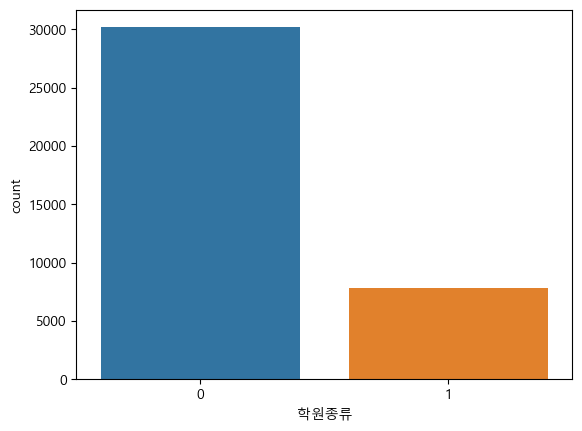

In [21]:
#데이터가 균형을 이루고 있는지 시각화를 통해 살펴보기
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=academy['학원종류']);

---
- 주의 : 머신러닝에서 불균형한 데이터를 다룰 때 0에 대한 학습량만 있으면 1에 대해 학습량이 적어 검증세트 정확도가 높아보이는 오류를 범할 수 있다. 나중에 머신러닝을 배울 때 자세히 다룰 예정
---

In [22]:
#학원종류와 시간과 비용 ('총교습시간(분)','기타경비합계', '총교습비') 변수 간 관계를 보기 위한 로지스틱회귀
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

academy['학원종류']
X = academy[['총교습시간(분)','기타경비합계', '총교습비']]
y = academy['학원종류']

original_column_names = list(X.columns)
original_column_names.insert(0, 'const')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

summary = result.summary(xname=original_column_names)
print(summary)

Optimization terminated successfully.
         Current function value: 0.445541
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   학원종류   No. Observations:                37992
Model:                          Logit   Df Residuals:                    37988
Method:                           MLE   Df Model:                            3
Date:                Wed, 14 Feb 2024   Pseudo R-squ.:                  0.1231
Time:                        16:49:26   Log-Likelihood:                -16927.
converged:                       True   LL-Null:                       -19304.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1583      0.021   -104.568      0.000      -2.199      -2.118
총교습시간(분)    4.143e-07   1.82e

In [ ]:
---


In [23]:
# 비용으로 학원종류에 대해 예측이 가능한 의사결정나무 모델
from sklearn.model_selection import train_test_split
target = '학원종류'
train, val = train_test_split(academy, train_size=0.8, test_size=0.2, stratify=academy[target], random_state=2)

features = ['총교습시간(분)', '교습비', '모의고시비', '재료비', '급식비', '기숙사비',
       '차량비', '피복비', '기타경비합계', '총교습비']
y_train = train[target]
X_train = train[features]
y_val = val[target]
X_val = val[features]
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((30393, 10), (30393,), (7599, 10), (7599,))

In [24]:
from sklearn.tree import DecisionTreeClassifier
# encoding 
from category_encoders import OrdinalEncoder
encoder = OrdinalEncoder()
# imputing 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

X_train_encoded = encoder.fit_transform(X_train)
X_train_imputed = imputer.fit_transform(X_train_encoded)

model_dt = DecisionTreeClassifier(max_depth=7) 
model_dt.fit(X_train_imputed, y_train)

X_val_encoded = encoder.transform(X_val)
X_val_imputed = imputer.transform(X_val_encoded)

print('검증세트 정확도: ', model_dt.score(X_val_imputed, y_val))

검증세트 정확도:  0.8915646795631004


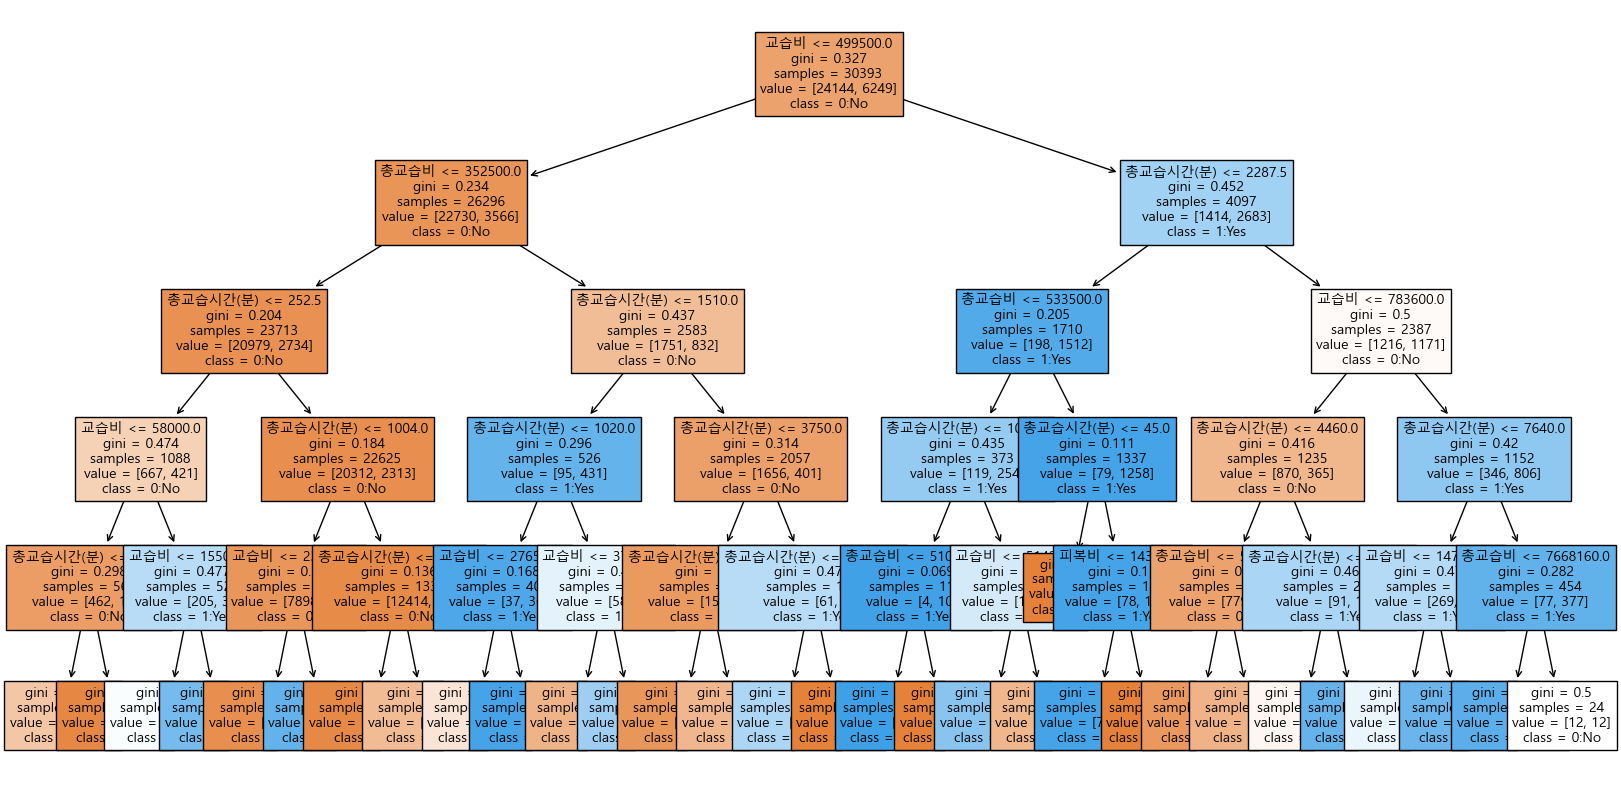

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model_dt = DecisionTreeClassifier(max_depth=5) 
model_dt.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model_dt, filled=True, feature_names=list(X_train_encoded.columns), class_names=['0:No', '1:Yes'], fontsize=10)
#plt.savefig('decision_tree.png', dpi=300)
plt.show()


In [26]:
importances = model_dt.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
1,교습비,0.661839
0,총교습시간(분),0.278299
9,총교습비,0.059447
7,피복비,0.000416
2,모의고시비,0.000000
3,재료비,0.000000
4,급식비,0.000000
5,기숙사비,0.000000
6,차량비,0.000000
8,기타경비합계,0.000000


---
의사결정 나무 모델을 이용해 교습비, 총교습시간, 총교습비로 학원 종류가 '학교교육'인지 '평생교육'인지 알 수 있을 것이다

---

## 5. 분석 결과 해석 및 인사이트 제안

* 분석 결과는 분석 아래에 작성하였습니다.
* 코드를 제외한 매끄러운 해석은 분석 보고서에 작성하였습니다.
* 결과 및 제언: 부산 관할 지역마다 교육분야별, 학원 종류 별 차이가 있었다.교습시간은 이상치를 제외하면 비슷한 시간대로 학습을 하였고, 가장 많은 학습이 이루어 지는 곳은 독서실이었다. 이는 독서실 학원의 특성이 반영된 것으로 사료된다. 학원 종류에 따라서는 교습학원보다 평생교육이 교습 시간은 더 길었으나 수 자체는 교습학원이 더 많았고, 학원종류는 다양한 변수의 영향을 받았다. 먼저 교육 분야에서는 교습학원은 '입시, 검정 및 보습' 분야가 다른 분야에 비해 압도적으로 높은 상관을 보였고, 평생교육은 '직업기술'에 집중되어 있었다. 이는 학원의 특성이 잘 반영된 것으로 보인다. 관할 교육지원청 별로 학원종류는 상이했는데, 교습학원은 타 지역보다 동래에서 약 2배정도 많이 있었다. 이는 부산의 지역적 특성으로 태어나서부터 살고 있는 동래에는 초중고등학교 대상의 교습학원이 많이 분포해있고, 외부인이 정착해 살아가는 다른 지역들은 상대적으로 적은 교습학원이 있음을 알 수 있다. 학원 종류에 대해 비용 측면에서 보면, 기타 경비는 큰 영향을 주지 못하지만 총교습비는 영향을 주는 것으로 보인다.

* 이번 부산 학원 현황 분석 보고서는 데이터를 토대로 예측 모델까지 구상하였지만 학원 규모 및 프로그램, 수요 및 경쟁, 교육 정책 및 환경분석과 같은 지역적, 문화적인 차이는 고려하지 못한 상태로 진행이 되었다. 이에 어재서 유의미한 차이가 났는지에 대한 사회문화적인 자료 수집과 그에 맞는 해석이 필요하고, 규모와 경쟁 등 외부적 요소를 추가하여 분석한다면 더 설득력 있는 보고서가 될 것으로 사료된다.

---

**감사합니다. 모두 고생 많으셨습니다.**

👏👏👏👏👏

---